In [4]:
from maelstrom import Maelstrom
from primitives import *
from competition import *
from snake_eyes.snakeeyes import readConfig

import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [5]:
config = readConfig('./configs/TestMaelstrom.cfg', globals(), locals())
for key in config:
    print(key)
    print(config[key])

DEFAULT
{}
MAELSTROM
{'islands': {'1': 'ISLAND', '2': 'ISLAND'}, 'migrationEdges': [{'source': ('1', 'predators'), 'destination': ('2', 'predators'), 'period': 3, 'size': 4, 'method': 'normal'}, {'source': ('1', 'prey'), 'destination': ('2', 'prey'), 'period': 3, 'size': 4, 'method': 'normal'}, {'source': ('2', 'predators'), 'destination': ('1', 'predators'), 'period': 3, 'size': 4, 'method': 'normal'}, {'source': ('2', 'prey'), 'destination': ('1', 'prey'), 'period': 3, 'size': 4, 'method': 'normal'}], 'evaluations': 50000}
GENERAL
{'render': False, 'default_test': False, 'analysis': False, 'logpath': 'logs/debug', 'experimentName': 'maelstromTest', 'runs': 2, 'numChampions': 5, 'findLocalChampions': True, 'finalChampions': 5, 'parallelizeRuns': True, 'popSize': 200, 'numChildren': 100, 'parentSelection': 'kTournament', 'kParent': 10, 'mutation': 0.05, 'survivalStrategy': 'plus', 'survivalSelection': 'truncation', 'depthLimit': 5, 'hardLimit': 20, 'depthMin': 1, 'outputType': 'Angle'}

In [6]:
maelstrom = Maelstrom(**config['MAELSTROM'], **config)

In [7]:
maelstrom = maelstrom.run()

  0%|          | 0/50000 [00:00<?, ? evals/s]

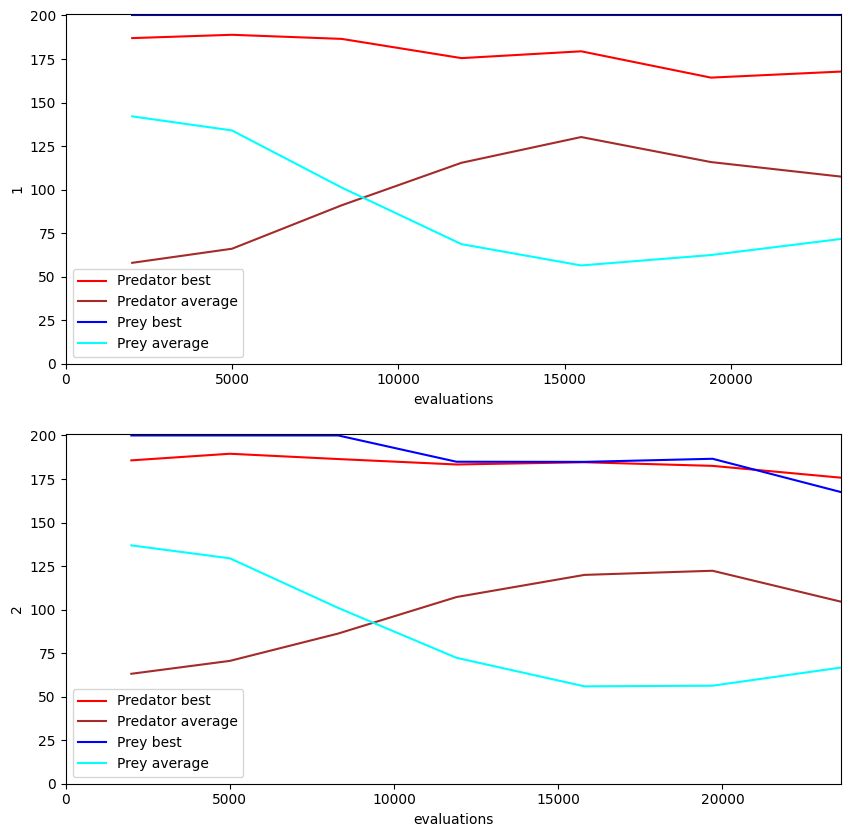

In [8]:
# print(maelstrom.islands['1'].log)
def plotMaelstrom(logs):
#     keys = list(maelstrom.islands.keys())
    islands = len(logs)
    island = 1
    for key, log in logs.items():
        plt.subplot(islands, 1, island)
        island += 1
#         key = keys[island]
        evals = log['evals']
        bestPred = log['bestPred']
        avgPred = log['avgPred']
        bestPrey = log['bestPrey']
        avgPrey = log['avgPrey']
        plt.plot(evals, bestPred, color = "red", label = "Predator best")
        plt.plot(evals, avgPred, color = "brown", label = "Predator average")
        plt.plot(evals, bestPrey, color = "blue", label = "Prey best")
        plt.plot(evals, avgPrey, color = "cyan", label = "Prey average")
        plt.ylabel(key)
        plt.xlabel("evaluations")
        plt.legend()
        plt.ylim(bottom=0, top=201)
        plt.xlim(left=0, right = evals[-1])

    plt.show()
plotMaelstrom(maelstrom.log)

In [9]:
print(maelstrom.champions)
champions = dict()
for species, population in maelstrom.champions.items():
    champions[species] = [gene for key, gene in population.items()]
print(champions)

{'predators': {'angle_to_prey(context)': <maelstrom.genotype.GeneticTree object at 0x7f2291e732e0>, 'if_greater_than(distance_to_opponent(context),multiply_distances(divide_distances(distance_to_opponent(context),distance_to_wallPredator(context)),distance_to_centerPredator(context)),angle_to_prey(context),angle_to_prey(context))': <maelstrom.genotype.GeneticTree object at 0x7f22920dc490>, 'subtract_angles(angle_to_prey(context),6.139096169229574)': <maelstrom.genotype.GeneticTree object at 0x7f22920dcbe0>, 'average_angles(multiply_angle(4.041269303203058,0.6825663133322135),average_angles(angle_to_centerPredator(context),angle_to_prey(context)))': <maelstrom.genotype.GeneticTree object at 0x7f22920dcf10>, 'if_greater_than(multiply_distances(0.02612401139921139,multiply_distances(0.5150507349842952,distance_to_centerPredator(context))),distance_to_centerPredator(context),multiply_angle(multiply_angle(predator_last_move(context),distance_to_opponent(context)),distance_to_centerPredator(

In [10]:
del maelstrom